In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import keras
import tensorflow

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
# from keras.optimizer_v1 import rmsprop (this is showing error as package has been renamed to tensorflow .keras)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def extract_mfcc(wav_file_name):
  y,sr =librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfccs

In [ ]:
ravdess_speech_labels = []
ravdess_speech_data=[]
for dirname, _,filenames in os.walk("/content/drive/MyDrive/sppech/"):
  for filename in filenames:
    #print(os.path.join(dirname,filename))
    ravdess_speech_labels.append(int(filename[7:8]) - 1)
    wav_file_name = os.path.join(dirname,filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name))#extract mfcc features/file
print("finish loading the Dataset")

finish loading the Dataset


In [ ]:
ravdess_speech_data

[array([-6.1398840e+02,  5.5380436e+01, -1.4584271e+01,  4.4758868e+00,
        -9.2133818e+00, -4.5764747e+00, -1.2888385e+01, -1.9763729e+01,
        -5.6679511e+00, -3.9381371e+00, -4.8708453e+00, -8.4960775e+00,
        -3.0677953e+00,  9.4222206e-01, -4.1832728e+00,  1.1427631e+00,
        -2.8265774e+00, -4.5129862e+00, -6.1253023e+00,  2.3971251e-01,
        -5.2123837e+00,  1.5988829e+00, -1.5304042e+00,  3.6791706e+00,
         1.6438453e+00,  2.9614217e+00,  6.4438403e-01,  5.5505261e+00,
         5.3553958e+00,  8.0278244e+00,  4.9933429e+00,  6.8718514e+00,
         6.6126041e+00,  8.5486870e+00,  5.8255448e+00,  4.6701756e+00,
         3.2489470e-01,  8.2534128e-01,  1.5183576e+00,  2.5529137e+00],
       dtype=float32),
 array([-5.8375903e+02,  3.0812733e+01, -9.2373981e+00,  4.6807736e-01,
        -7.2963586e+00, -8.6248140e+00, -4.9801621e+00, -1.4939533e+01,
        -8.9101877e+00, -4.0143704e+00, -4.7838631e+00, -6.3318653e+00,
        -8.2137823e+00,  2.8795791e+00, 

In [ ]:
ravdess_speech_data_array=np.asarray(ravdess_speech_data)
ravdess_speech_label_array=np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical =to_categorical(ravdess_speech_label_array)
labels_categorical.shape


(2880, 8)

In [ ]:
ravdess_speech_data_array

array([[-6.1398840e+02,  5.5380436e+01, -1.4584271e+01, ...,
         8.2534128e-01,  1.5183576e+00,  2.5529137e+00],
       [-5.8375903e+02,  3.0812733e+01, -9.2373981e+00, ...,
         4.4110304e-01, -2.0796275e+00, -3.4784529e-01],
       [-5.3826654e+02,  2.8846996e+01, -1.2098068e+01, ...,
         6.5192737e-02, -8.1537165e-02,  5.7026690e-01],
       ...,
       [-5.7196942e+02,  6.1950554e+01, -6.7789083e+00, ...,
        -3.2299340e+00, -3.1221108e+00, -1.0148424e+00],
       [-5.3282916e+02,  4.6737095e+01, -5.7191262e+00, ...,
        -1.7440729e+00, -2.4262702e+00, -2.2830480e-01],
       [-5.1449457e+02,  4.3662453e+01, -2.8950770e+00, ...,
        -1.2374359e+00, -1.9954162e+00,  1.7511923e+00]], dtype=float32)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [ ]:
number_of_samples =ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples *0.8)
validation_samples = int(number_of_samples *0.1)
test_samples = int(number_of_samples*0.1)

In [ ]:
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))


  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model


In [ ]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [ ]:
w.shape

(2304, 40, 1)

In [ ]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples],validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1),labels_categorical[training_samples:training_samples+validation_samples]),epochs=133,shuffle=True)

Epoch 1/133
72/72 [==============================] - 9s 85ms/step - loss: 2.0765 - accuracy: 0.1424 - val_loss: 2.0587 - val_accuracy: 0.1597
Epoch 2/133
72/72 [==============================] - 3s 48ms/step - loss: 2.0406 - accuracy: 0.1749 - val_loss: 1.9979 - val_accuracy: 0.2465
Epoch 3/133
72/72 [==============================] - 4s 49ms/step - loss: 1.9809 - accuracy: 0.2127 - val_loss: 1.9319 - val_accuracy: 0.2812
Epoch 4/133
72/72 [==============================] - 5s 65ms/step - loss: 1.9383 - accuracy: 0.2409 - val_loss: 1.8511 - val_accuracy: 0.2917
Epoch 5/133
72/72 [==============================] - 4s 59ms/step - loss: 1.9104 - accuracy: 0.2483 - val_loss: 1.8285 - val_accuracy: 0.3090
Epoch 6/133
72/72 [==============================] - 4s 49ms/step - loss: 1.8773 - accuracy: 0.2617 - val_loss: 1.8683 - val_accuracy: 0.2812
Epoch 7/133
72/72 [==============================] - 3s 48ms/step - loss: 1.8552 - accuracy: 0.2817 - val_loss: 1.7918 - val_accuracy: 0.2847
Epoch 

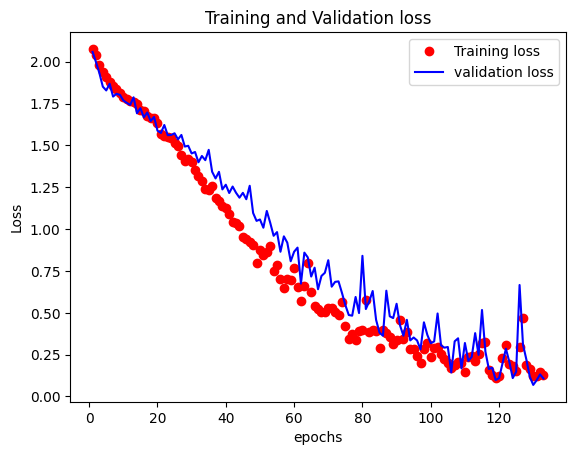

In [ ]:
loss = history .history['loss']
val_loss = history.history['val_loss']

epochs =range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

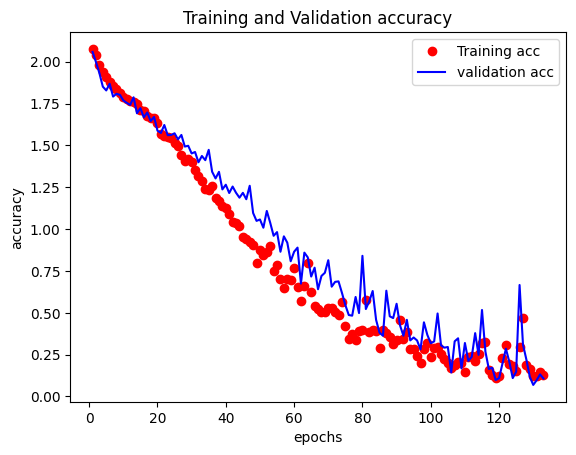

In [ ]:
acc = history .history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs,loss,'ro',label='Training acc')
plt.plot(epochs,val_loss,'b',label='validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()

plt.show()

In [ ]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:], -1), labels_categorical[training_samples+validation_samples:])

9/9 [==============================] - 0s 21ms/step - loss: 0.0474 - accuracy: 0.9965


[0.04744673892855644, 0.9965277910232544]

In [ ]:
emotions ={1:'neutral',
           2:'calm',
           3:'happy',
           4:'sad',
           5:'angry',
           6:'fearful',
           7:'disgust',
           8:'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])






In [ ]:
predict('/content/drive/MyDrive/sppech/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

1/1 [==============================] - 1s 743ms/step
neutral


In [ ]:
predict('/content/drive/MyDrive/sppech/Actor_03/03-01-01-01-01-01-03.wav')

1/1 [==============================] - 0s 41ms/step
neutral


In [ ]:
predict('/content/drive/MyDrive/sppech/audio_speech_actors_01-24/Actor_24/03-01-02-02-01-02-24.wav')

1/1 [==============================] - 0s 40ms/step
calm


In [ ]:
model_A.save('mymodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
modelc=tf.keras.models.load_model('mymodel.h5')

NameError: name 'tf' is not defined

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.75.46.138


In [31]:
! streamlit run app.py




Aborted!


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 7.005s
your url is: https://spicy-dogs-boil.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.46.138:8501

2024-03-29 05:07:59.547394: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 05:07:59.547511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 05:07:59.553358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-29 05:08:01.328294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-29 05:08:05.345 `st.